In [31]:
import autograd.numpy as np  
import matplotlib.pyplot as plt
from autograd import grad, hessian

In [15]:
b = 1.41

def f_x(X): 
    return 5*X[0]**2 +  X[0] * X[1] + 5*X[1]**2 + X[0] + X[1] 

grad_func_auto = grad(f_x)
hessian_func_auto = hessian(f_x)
def grad_func(x):
    return grad_func_auto(x)

def hessian_func(x):
    return hessian_func_auto(x)

# descent du gradient à pas fixe
def gradient_descent_fixed_step(f, grad_f, x0, learning_rate=0.01, max_iter=1000, tol=1e-6):
    x = x0
    path = [x.copy()] 
    print(grad_f(x)) 
    for i in range(max_iter):
        gradient = grad_f(x)
        x_new = x - learning_rate * gradient
        if np.linalg.norm(x_new - x) < 0.3:
            break
        x = x_new
        path.append(x.copy())
    print(path)
    return path

In [16]:
def gradient_descent_variable_step(f, grad_f, x0, initial_lr=0.1, decay_rate=0.8, max_iter=1000, tol=1e-6):
    x = x0
    path = [x.copy()]  
    learning_rate = initial_lr
    for i in range(max_iter):
        gradient = grad_f(x)
        x_new = x - learning_rate * gradient
        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new
        path.append(x.copy())
        learning_rate *= decay_rate  
    return path

In [17]:
def newtons_method(f, grad_f, hessian_f, x0, max_iter=100, tol=1e-6):
    x = x0
    path = [x.copy()]  # Enregistrement du chemin
    for i in range(max_iter):
        gradient = grad_f(x)
        hessian = hessian_f(x)
        if np.linalg.norm(gradient) < tol:
            break
        x_new = x - np.linalg.inv(hessian) @ gradient
        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new
        path.append(x.copy())
    return path

In [18]:
def quasi_newtons_method(f, grad_f, x0, max_iter=100, tol=1e-6):
    x = x0
    n = len(x0)
    H = np.eye(n)  # Matrice d'identité initiale comme approximation de la Hessienne
    path = [x.copy()]  # Enregistrement du chemin
    for i in range(max_iter):
        gradient = grad_f(x)
        if np.linalg.norm(gradient) < tol:
            break
        p = -H @ gradient
        x_new = x + p
        s = x_new - x
        y = grad_f(x_new) - gradient
        rho = 1.0 / (y @ s)
        H = (np.eye(n) - rho * np.outer(s, y)) @ H @ (np.eye(n) - rho * np.outer(y, s)) + rho * np.outer(s, s)
        x = x_new
        path.append(x.copy())
    return path

In [19]:
def nesterov_accelerated_gradient(f, grad_f, x0, learning_rate=0.01, momentum=0.9, max_iter=1000, tol=1e-6):
    x = x0
    v = np.zeros_like(x0)  # Initialiser la vitesse à zéro
    path = [x.copy()]  # Enregistrement du chemin
    print(grad_f)
    for i in range(max_iter):
        x_ahead = x - momentum * v  # Calculer le point "anticipé"
        
        gradient = grad_f(x_ahead)
        v = momentum * v + learning_rate * gradient
        x_new = x - v
        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new
        path.append(x.copy())
    return path


In [27]:
def plot_convergence_2d(paths):
    """Affiche les chemins de convergence pour chaque méthode d'optimisation en 2D avec des lignes de niveau."""
    fig, ax = plt.subplots(figsize=(8, 6))

    # Créer un espace 2D pour visualiser les trajectoires
    x = np.linspace(-3, 3, 100)
    y = np.linspace(-3, 3, 100)
    X, Y = np.meshgrid(x, y)
    Z = X**2 + 1.41*X*Y + Y**2  # Fonction en 2D dans l’espace x-y

    # Contours de niveau
    contour = ax.contour(X, Y, Z, levels=20, cmap="viridis")
    ax.clabel(contour, inline=True, fontsize=8)

    # Ajouter les trajectoires de chaque méthode
    for method, path in paths.items():
        x_vals = [p[0] for p in path]
        y_vals = [p[1] for p in path]
        ax.plot(x_vals, y_vals, marker='o', linestyle='-', label=method)

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend()
    ax.set_title("Convergence Paths of Different Optimization Methods (2D Contour Plot)")
    plt.show()

Affichage

[12. 12.  0.]
[array([1., 1., 1.]), array([-0.2, -0.2,  1. ])]
<function unary_to_nary.<locals>.nary_operator.<locals>.nary_f at 0x7502b802df80>


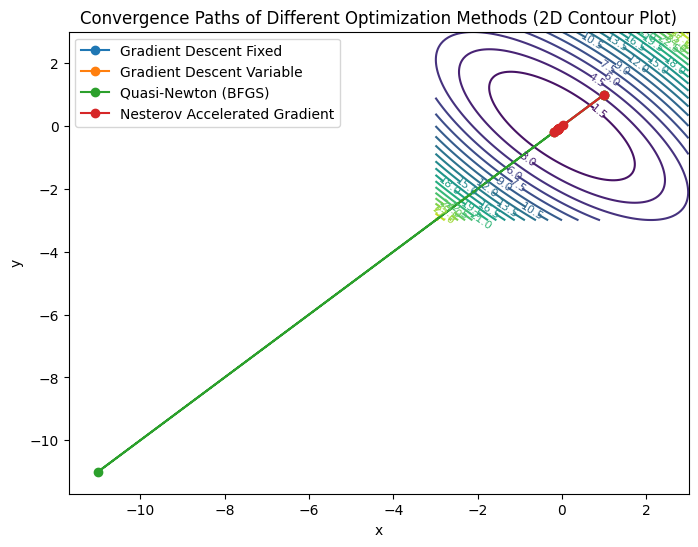

In [30]:
x0 = np.array([1.0, 1.0, 1.0])
learning_rate = 0.1
max_iter = 100
# beta = 1.41
# beta = 0.11
alpha = 0.1
paths = {
    'Gradient Descent Fixed': gradient_descent_fixed_step(f_x, grad_func_auto, x0, learning_rate, max_iter),
    'Gradient Descent Variable': gradient_descent_variable_step(f_x, grad_func_auto, x0, learning_rate, max_iter=max_iter),
    # 'Newton\'s Method': newtons_method(f_x, grad_func_auto, hessian_func_auto, x0, max_iter=max_iter),
    'Quasi-Newton (BFGS)': quasi_newtons_method(f_x, grad_func_auto, x0, max_iter=max_iter),
    'Nesterov Accelerated Gradient': nesterov_accelerated_gradient(f_x, grad_func_auto, x0, learning_rate, max_iter=max_iter)
}
plot_convergence_2d(paths)
